<a href="https://colab.research.google.com/github/AbrahamKong/CMPE257-Clustering_with_GNN_Assignment/blob/main/CMPE_257_Clustering_with_GNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source
# https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
# Read in Data
df = pd.read_csv("/content/olist_geolocation_dataset.csv")
df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# discard un-used data and prepare data for K-means clustering
X = df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']).to_numpy()
X

array([[-23.54562128, -46.63929205],
       [-23.54608113, -46.6448203 ],
       [-23.54612897, -46.64295148],
       ...,
       [-28.07185542, -52.01471587],
       [-28.38893188, -51.84687132],
       [-28.07010363, -52.01865773]])

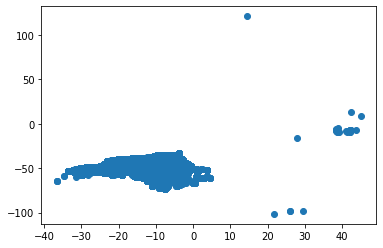

In [ ]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], label='True Position')

###K-Means with Scikit###

In [ ]:
# Create Clusters
# let K = 4 based on eye-balling the data
numOfClusters = 4
kmeans = KMeans(n_clusters = numOfClusters)
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
# Explore the clusters
print(kmeans.cluster_centers_)
# print(kmeans.labels_)

[[-22.1055109  -45.76532844]
 [ -9.09621924 -38.67841424]
 [ -8.28350787 -54.18087283]
 [-26.62743932 -51.206324  ]]


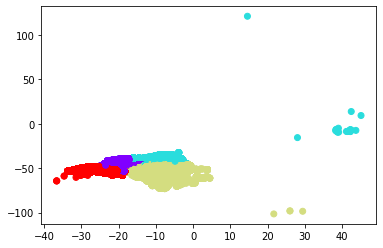

In [ ]:
# Visualize K Means with 4 clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="rainbow")

###K-Means with Tenserflow###

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()

In [ ]:
# Assign data to tensor constant and find random 4 centroids
points = tf.constant(X)
centroids = tf.Variable(tf.slice(tf.random.shuffle(points), [0, 0], [numOfClusters, -1]))

In [ ]:
# Transfer 2D tensors into 3D for broadcasting features
points_3d = tf.expand_dims(points, 0)
centroids_3d = tf.expand_dims(centroids, 1) 

In [ ]:
# Calculate distances between data and centroids using Euclidean Distance to determine clusters 
d = tf.reduce_sum(tf.square(tf.subtract(points_3d, centroids_3d)), 2)
clusters = tf.argmin(d, 0)

In [ ]:
# Compare each random cluster with cluster assignment calculated above
# Assign each data point to clusters
# Calculate mean values and set them as the updated centroids

means = []
for c in range(numOfClusters):
  means.append(tf.reduce_mean(
      tf.gather(
          points, 
          tf.reshape(
              tf.where(
                  tf.equal(clusters, c)
              ), [1, -1])
      ), reduction_indices=[1]))

  
centroids_new = tf.concat(means, 0)
centroids_updated = centroids.assign(centroids, centroids_new)

In [ ]:
# Build updated clusters and display results
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for step in range(100):
    [_, centroid_values, points_values, assignment_values] = sess.run([centroids_updated, centroids, points, clusters])
     
  print("centroids: ", centroid_values)

centroids:  [[-12.88137531 -38.30544587]
 [-22.30790608 -45.37659658]
 [-19.45201204 -44.25256139]
 [-23.51932419 -46.15079433]]


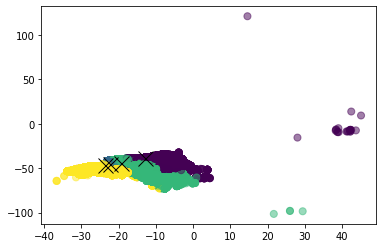

In [ ]:
# Visualize clusters
plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()

**Reference**

[2.3. Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)

[Implementing k-means Clustering with TensorFlow
](https://www.altoros.com/blog/using-k-means-clustering-in-tensorflow/)